1. Khai báo thư viện

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2. đọc dữ liệu

In [83]:
df = pd.read_excel('./datasetHeHoTro.xlsx')

print(df)

         ID_HV                  HoTen  TrinhDo    DoTuoi         ID_KH  \
0     72019075      Huỳnh Thị Trúc Ly  Kaiwa 2   Trên 30   SKAI21030VN   
1    112019125           Vũ Hoàng Yến  Kaiwa 3  Từ 18-30   SKAI3N060VN   
2    112019128  Nguyễn Thị Thanh Kiều  Kaiwa 3  Từ 18-30   SKAI11030VN   
3    112019132                 Lê Hoa  Kaiwa 4   Trên 30   SKAI3N060VN   
4    112019140        Nguyễn Tiến Hải  Kaiwa 3  Từ 18-30   SKAI31030VN   
..         ...                    ...      ...       ...           ...   
560  420229560      Nguyễn Quang Việt  Kaiwa 1   Trên 30  CKAI121030VN   
561  420247205       Trương Đinh Tuấn  Kaiwa 1   Trên 30   SKAI11030VN   
562  420239068        TRẦN XUÂN THỊNH  Kaiwa 1  Từ 18-30   SKAI1N060VN   
563  420245339           Trần Thị Thu  Kaiwa 1   Trên 30   SKAI1N060VN   
564  420247377           Tô Văn Thuận  Kaiwa 1  Từ 18-30  CKAI121030VN   

       LoaiGV  ThangBDHoc NgayHoc       Lam_BTVN PhanhoiChamSoc  \
0    Việt Nam          10     357  Hoàn thàn

3. Mô tả dữ liệu

In [84]:
#Số lượng mẫu và thuộc tính
df.shape

(565, 13)

In [85]:
df.head(10)

,ID_HV,HoTen,TrinhDo,DoTuoi,ID_KH,LoaiGV,ThangBDHoc,NgayHoc,Lam_BTVN,PhanhoiChamSoc,DanhGiaCuaCVHT,DanhgiaveGV,Taituc
0,72019075,Huỳnh Thị Trúc Ly,Kaiwa 2,Trên 30,SKAI21030VN,Việt Nam,10,357,Hoàn thành đủ,Hài lòng,Tốt,Tốt,Có
1,112019125,Vũ Hoàng Yến,Kaiwa 3,Từ 18-30,SKAI3N060VN,Việt Nam,12,357,Làm ít,Chưa hài lòng,Bình Thường,Bình Thường,Không
2,112019128,Nguyễn Thị Thanh Kiều,Kaiwa 3,Từ 18-30,SKAI11030VN,Việt Nam,12,357,Làm ít,Chưa hài lòng,Bình Thường,Kém,Không
3,112019132,Lê Hoa,Kaiwa 4,Trên 30,SKAI3N060VN,Việt Nam,12,357,Hoàn thành đủ,Bình thường,Bình Thường,Bình Thường,Có
4,112019140,Nguyễn Tiến Hải,Kaiwa 3,Từ 18-30,SKAI31030VN,Việt Nam,12,246,Chưa làm,Chưa hài lòng,Bình Thường,Bình Thường,Không
5,420237187,Hoàng Hồng Ánh,Kaiwa 1,Trên 30,SKAI11030VN,Việt Nam,12,246,Chưa làm,Hài lòng,Bình Thường,Bình Thường,Có
6,420236639,Nguyễn Thị Thanh Tâm,Kaiwa 2,Trên 30,SKAI21030VN,Việt Nam,1,246,Làm ít,Bình thường,Bình Thường,Bình Thường,Không
7,420237074,Ngô Sỹ Trung,Kaiwa 2,Từ 18-30,CKAI231030VN,Việt Nam,12,246,Làm ít,Chưa hài lòng,Bình Thường,Bình Thường,Không
8,420237698,Nguyễn Đức Trưởng,Kaiwa 2,Trên 30,SKAI21030VN,Việt Nam,12,246,Hoàn thành đủ,Bình thường,Bình Thường,Bình Thường,Không
9,420237285,Huỳnh Thanh Tuyền,Kaiwa 2,Từ 18-30,CKAI231030VN,Việt Nam,12,246,Chưa làm,Hài lòng,Tốt,Tốt,Có


In [86]:
# Các giá trị thống kê
df.isnull().sum()

ID_HV             0
HoTen             0
TrinhDo           0
DoTuoi            0
ID_KH             0
LoaiGV            0
ThangBDHoc        0
NgayHoc           0
Lam_BTVN          2
PhanhoiChamSoc    2
DanhGiaCuaCVHT    2
DanhgiaveGV       2
Taituc            2
dtype: int64

In [87]:
# Hiển thị kiểu dữ liệu của các thuộc tính
df.dtypes

ID_HV              int64
HoTen             object
TrinhDo           object
DoTuoi            object
ID_KH             object
LoaiGV            object
ThangBDHoc         int64
NgayHoc           object
Lam_BTVN          object
PhanhoiChamSoc    object
DanhGiaCuaCVHT    object
DanhgiaveGV       object
Taituc            object
dtype: object

4. Tiền xử lý dữ liệu

In [88]:
# Đổi dữ liệu từ dạng định danh (object) về dạng số
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["HoTen"] = lb_make.fit_transform(df["HoTen"])
df["TrinhDo"] = lb_make.fit_transform(df["TrinhDo"])
df["DoTuoi"] = lb_make.fit_transform(df["DoTuoi"])
df["ID_KH"] = lb_make.fit_transform(df["ID_KH"])
df["LoaiGV"] = lb_make.fit_transform(df["LoaiGV"])
df["NgayHoc"] = lb_make.fit_transform(df["NgayHoc"])
df["Lam_BTVN"] = lb_make.fit_transform(df["Lam_BTVN"])
df["PhanhoiChamSoc"] = lb_make.fit_transform(df["PhanhoiChamSoc"])
df["DanhGiaCuaCVHT"] = lb_make.fit_transform(df["DanhGiaCuaCVHT"])
df["DanhgiaveGV"] = lb_make.fit_transform(df["DanhgiaveGV"])
df["Taituc"] = lb_make.fit_transform(df["Taituc"])

df.head(10) #10 dòng đầu tiên

,ID_HV,HoTen,TrinhDo,DoTuoi,ID_KH,LoaiGV,ThangBDHoc,NgayHoc,Lam_BTVN,PhanhoiChamSoc,DanhGiaCuaCVHT,DanhgiaveGV,Taituc
0,72019075,60,1,1,18,1,10,1,1,2,2,2,0
1,112019125,486,2,2,21,1,12,1,2,1,0,0,1
2,112019128,247,2,2,16,1,12,1,2,1,0,1,1
3,112019132,85,3,1,21,1,12,1,1,0,0,0,0
4,112019140,271,2,2,20,1,12,0,0,1,0,0,1
5,420237187,34,0,1,16,1,12,0,0,2,0,0,0
6,420236639,249,1,1,18,1,1,0,2,0,0,0,1
7,420237074,307,1,2,6,1,12,0,2,1,0,0,1
8,420237698,303,1,1,18,1,12,0,1,0,0,0,1
9,420237285,50,1,2,6,1,12,0,0,2,2,2,0


5. Xây dựng mô hình dự đoán tái tiếp tục đăng ký khóa học của học viên sau khi hoàn thành khóa học trước đó

5.1. Chuẩn bị tập dữ liệu huấn luyện (train) và tập dữ liệu kiểm thử (test)

In [89]:
# Xác định các thuộc tính độc lập X và thuộc tính phụ thuộc y
features = ['TrinhDo', 'DoTuoi', 'ID_KH', 'LoaiGV', 'ThangBDHoc', 'NgayHoc', 'Lam_BTVN', 'PhanhoiChamSoc', 'DanhGiaCuaCVHT', 'DanhgiaveGV']
            
target = ['Taituc'] 
X = df[features]
y = df[target]

In [90]:
# Chia bộ dữ liệu thành hai tập: train & test (theo tỉ lệ 70% & 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

5.2 Xây dựng mô hình học

5.2.1 Cây quyết định Decision Tree

In [91]:
# Lựa chọn kỹ thuật học cây quyết định (thêm các tham số nếu cần can thiệp sâu hơn)
model = tree.DecisionTreeClassifier()

# Đưa dữ liệu vào huấn luyện mô hình
model = model.fit(X_train.values, y_train.values)

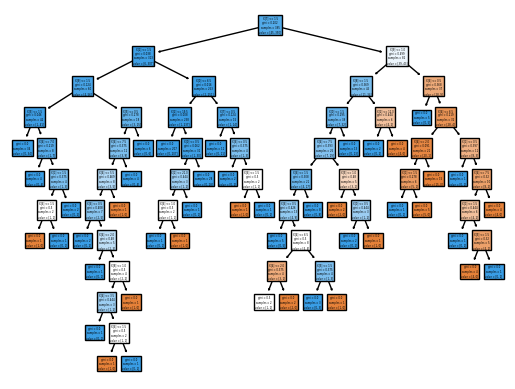

In [92]:

tree.plot_tree(model, filled = True);

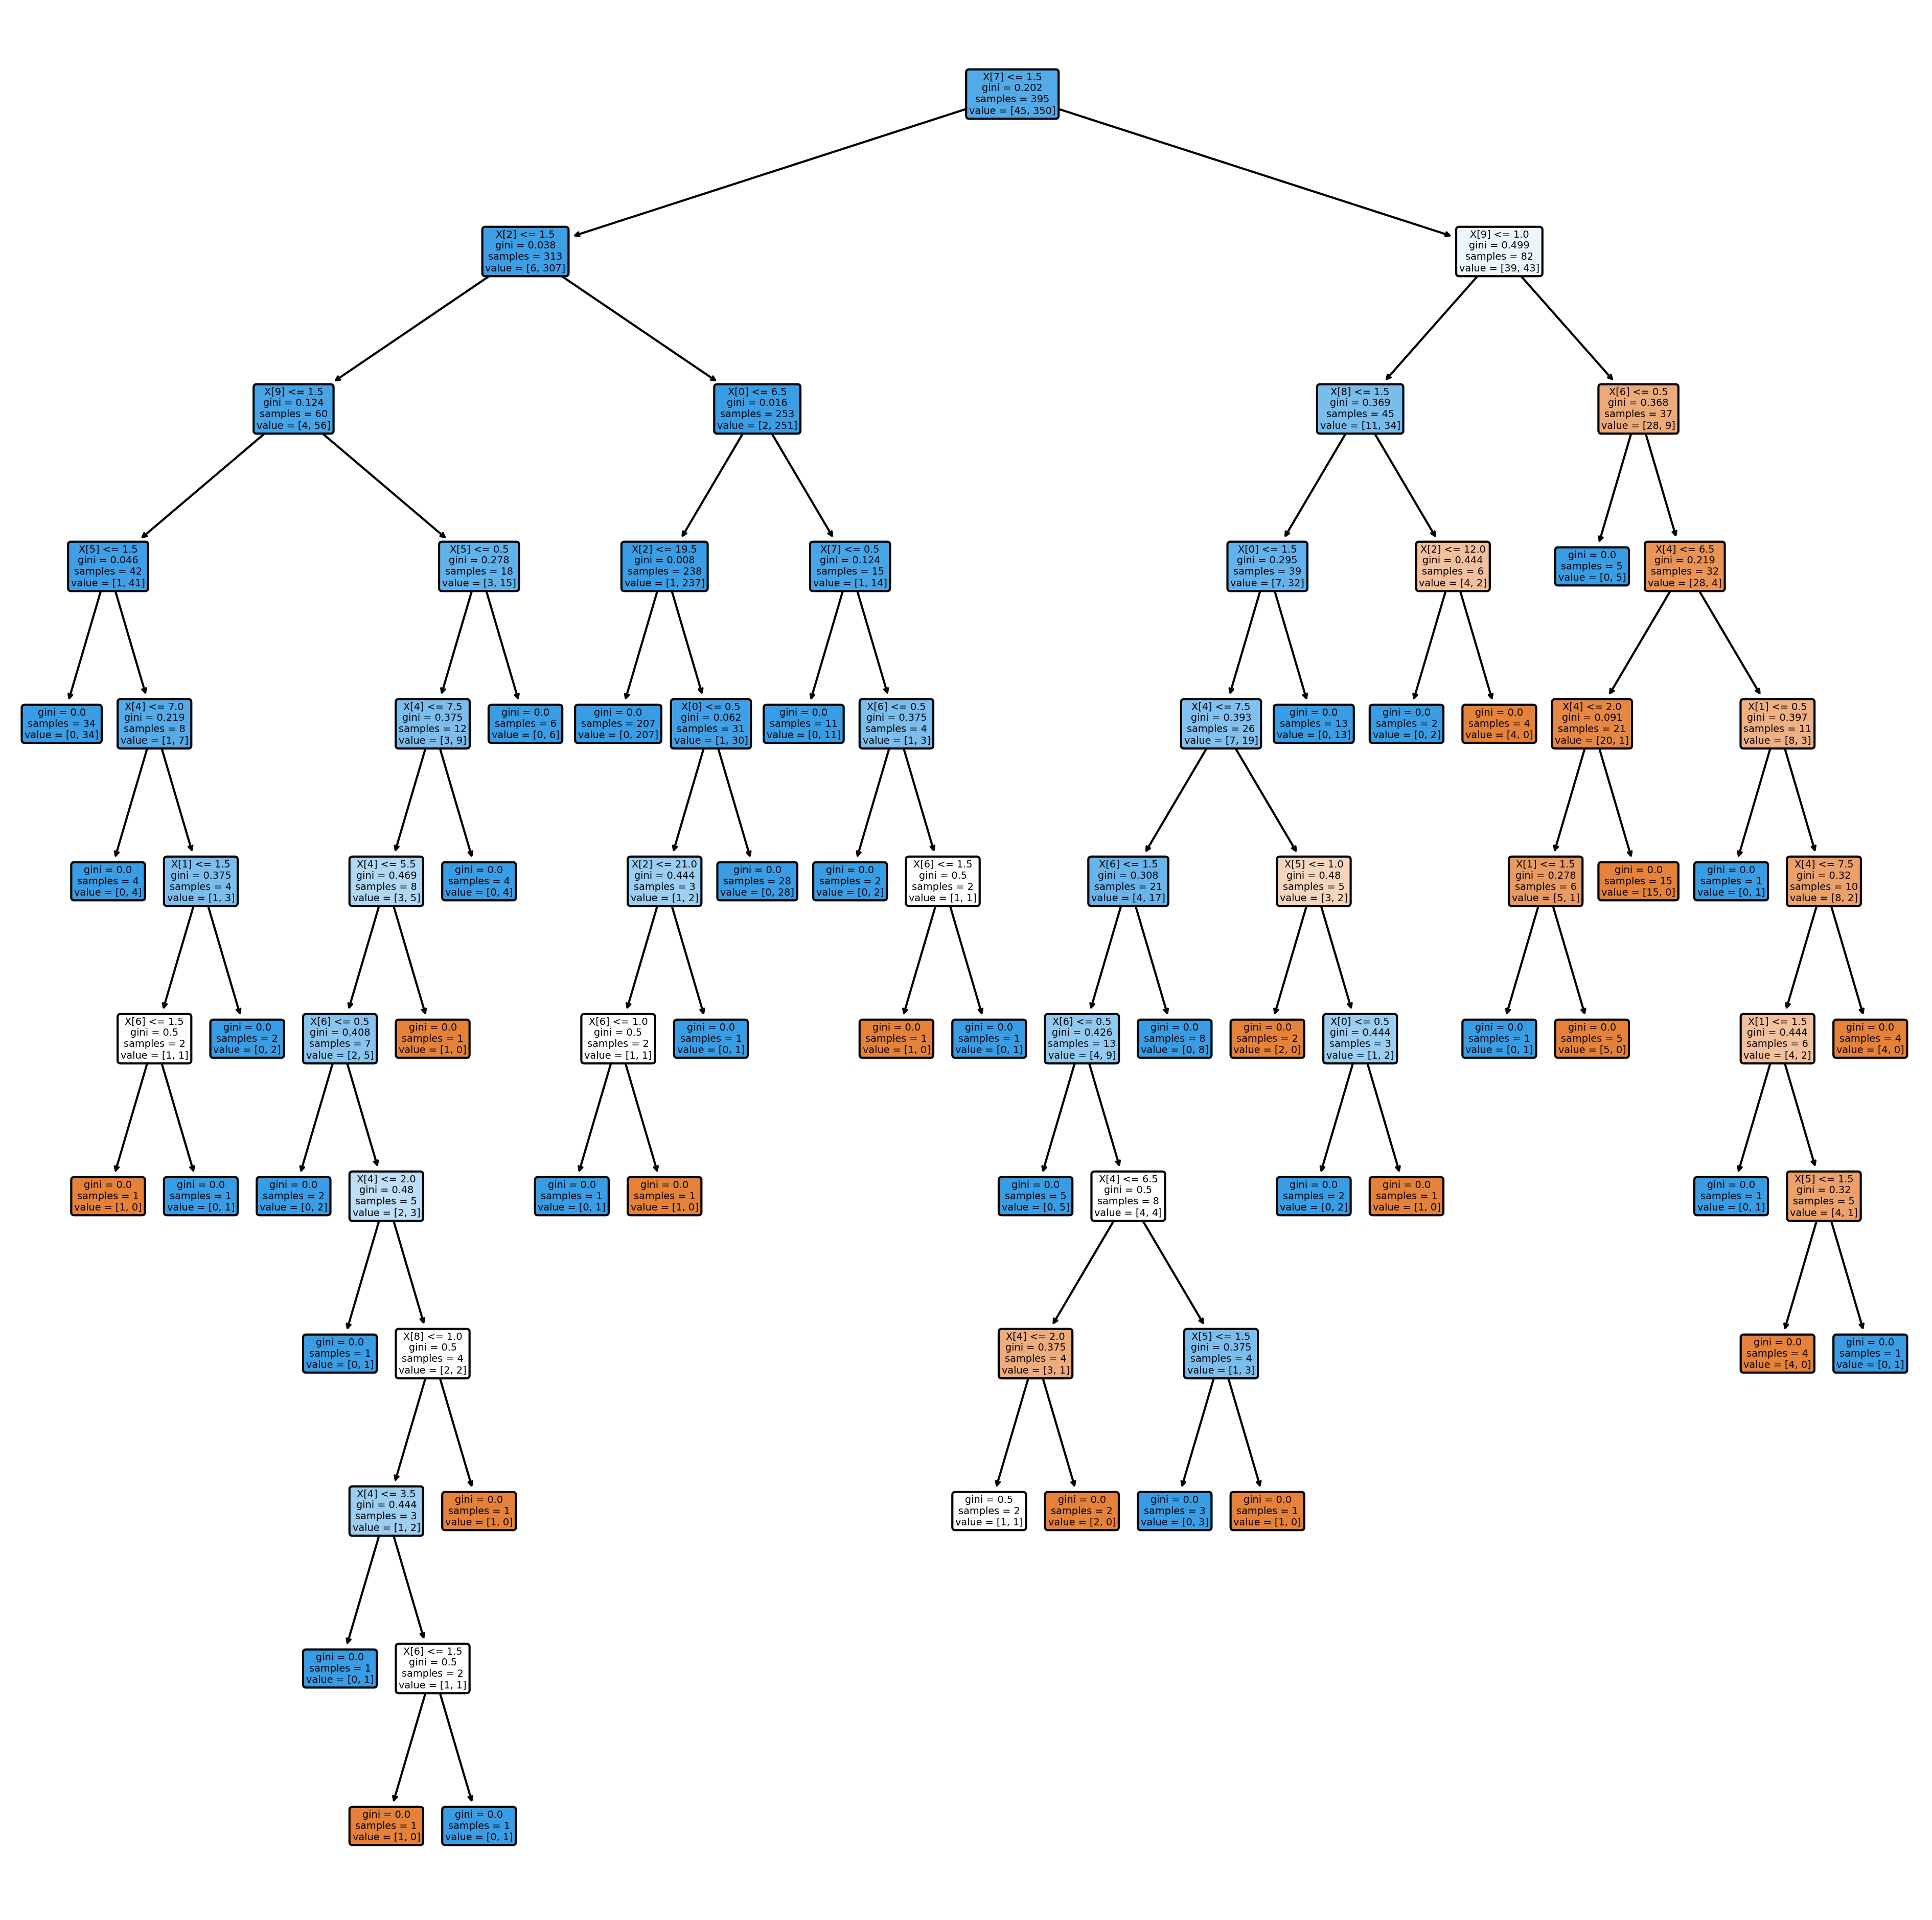

In [93]:
#Lưu lại cây quyết định với hình ảnh mong muốn
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=300)
_=tree.plot_tree(model,filled=True,rounded=True, ax=axes)
plt.savefig('decision_tree.png')

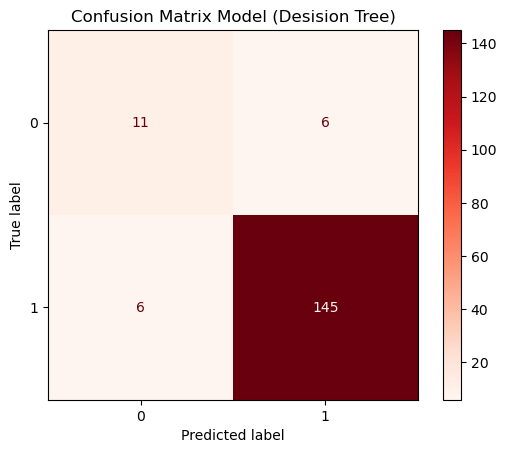

In [94]:
#Xây dựng ma trận nhầm lẫn (Confusion Matrix)
predictions = model.predict(X_test.values)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
disp.ax_.set_title('Confusion Matrix Model (Desision Tree)')
plt.show()

5.2.2. Cây quyết định Random Forest

In [95]:
# Lựa chọn kỹ thuật học Random Forest (thêm các tham số nếu cần can thiệp sâu hơn)
modelRandomForest = RandomForestClassifier()

# Đưa dữ liệu vào huấn luyện mô hình
modelRandomForest.fit(X_train.values, y_train.values.ravel())

RandomForestClassifier()

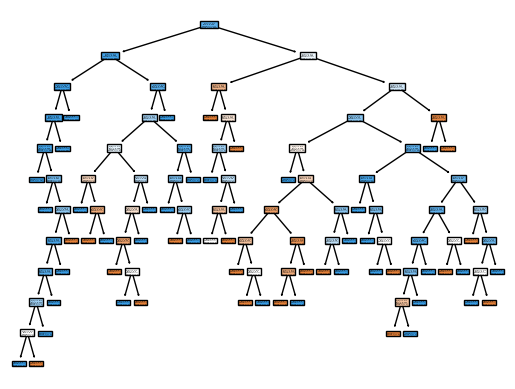

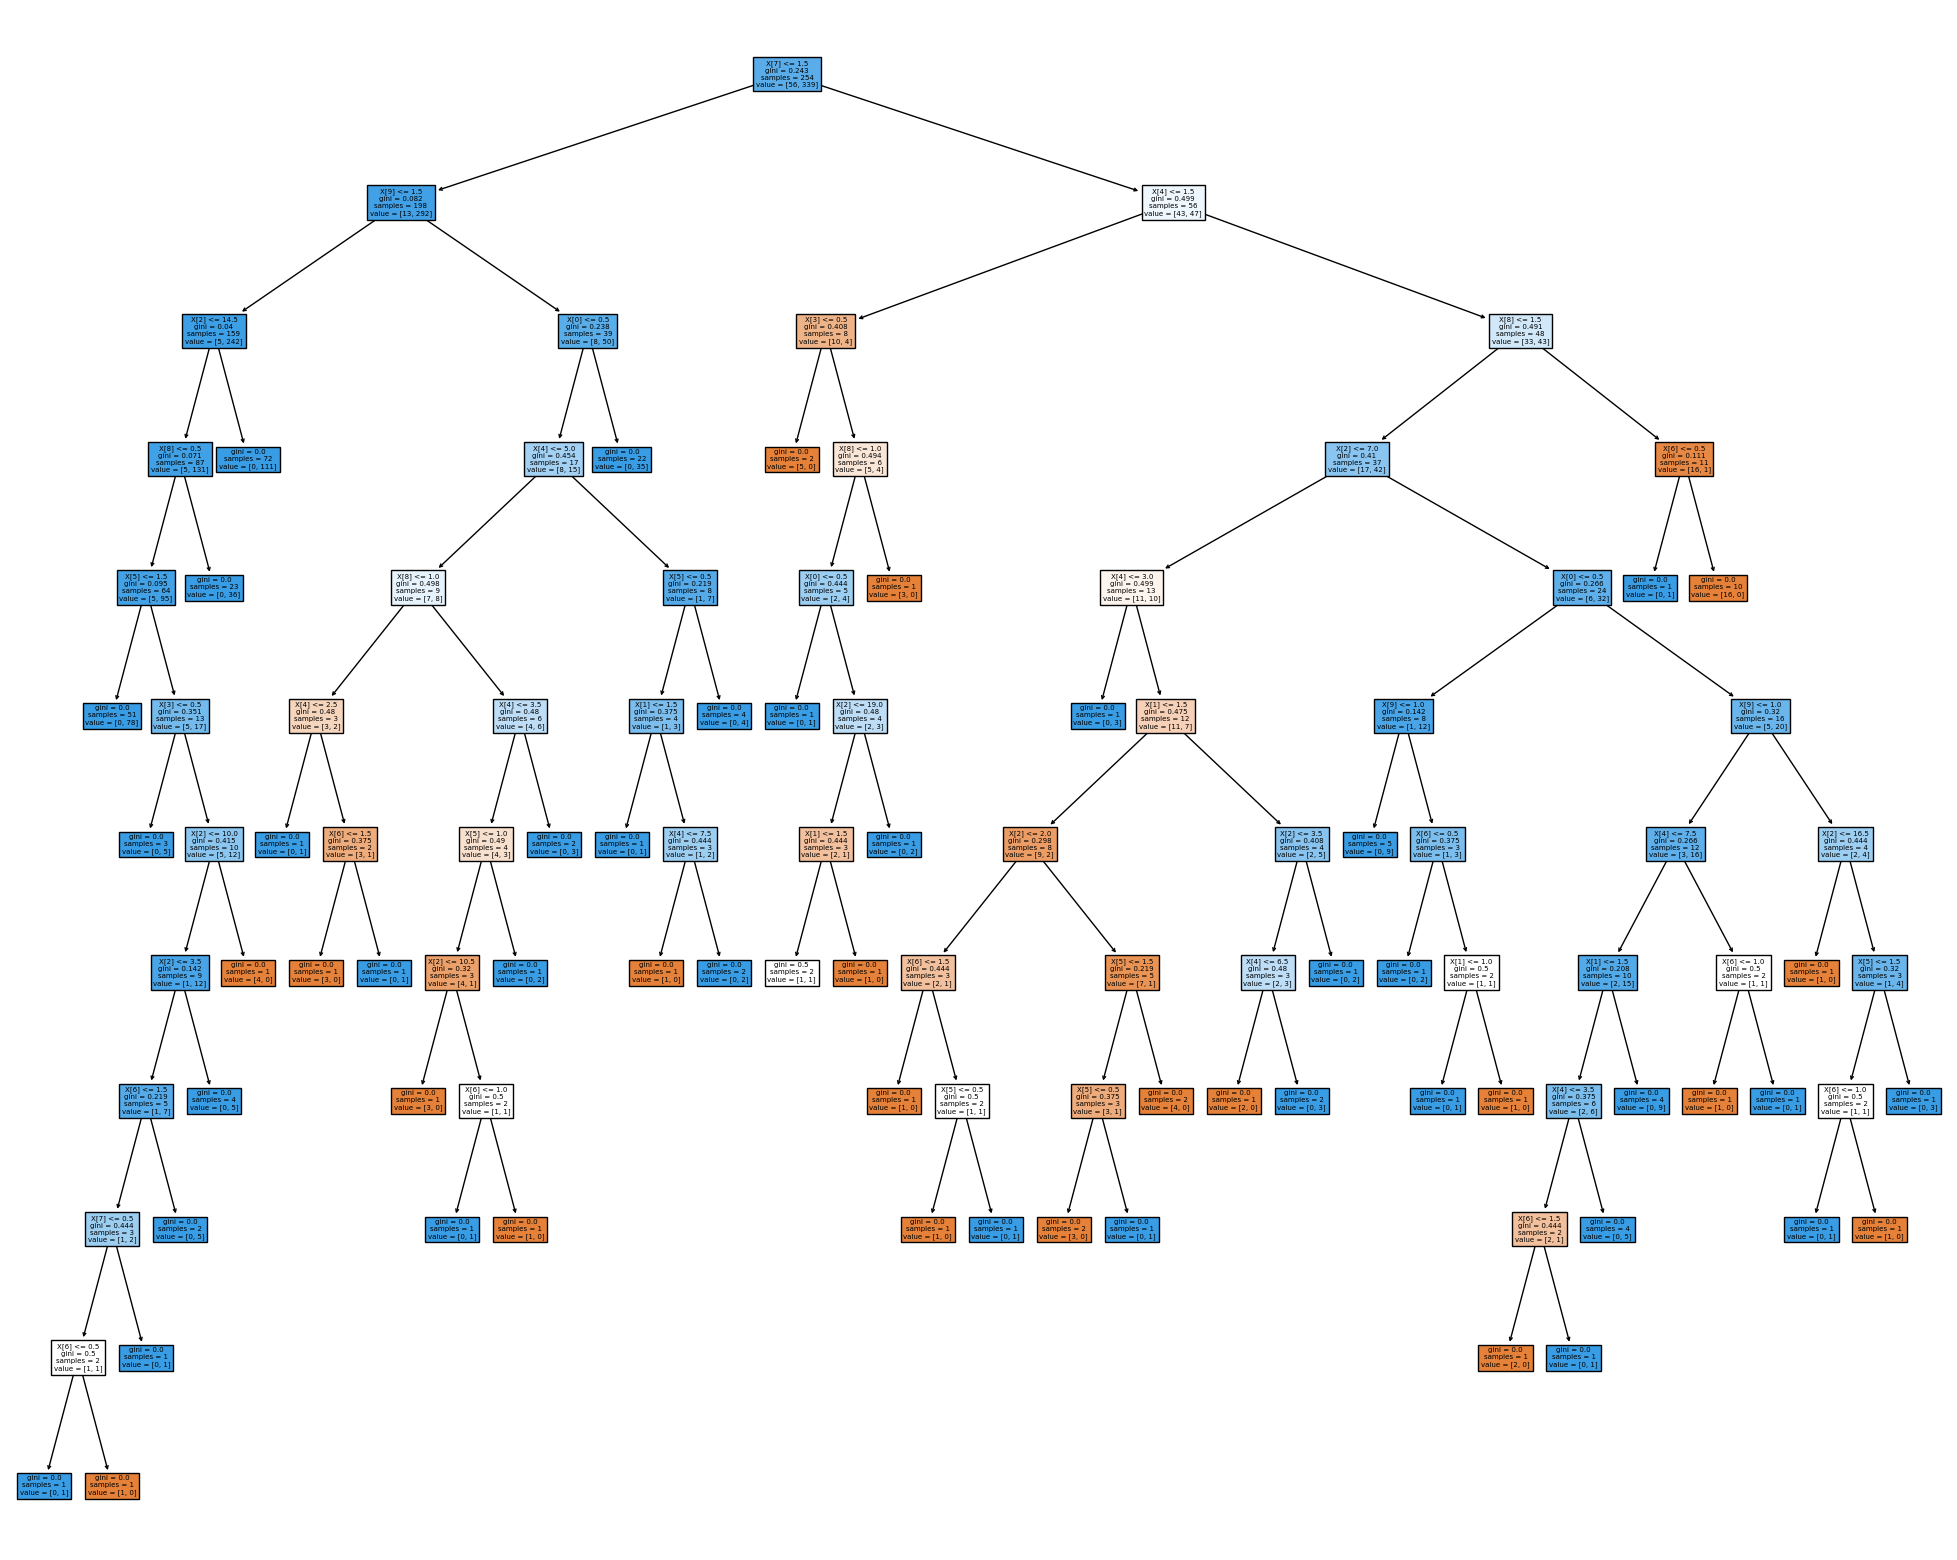

In [96]:
# Hiển thị mô hình: ví dụ một cây trong rừng ngẫu nhiên
estimator = modelRandomForest.estimators_[1] # cây thứ 2 của rừng
plot_tree(estimator, filled = True)
plt.show()

# Lưu lại cây dưới dạng ảnh nếu muốn
figRandomForest = plt.figure(figsize = (25,20))
_= plot_tree(estimator, filled = True)
figRandomForest.savefig("random_Forest.png")

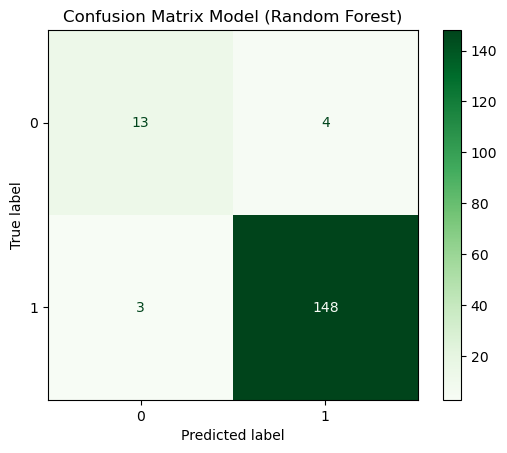

In [97]:
#Xây dựng ma trận nhầm lẫn (Confusion Matrix)

predictionsRandomForest = modelRandomForest.predict(X_test.values)
cm = confusion_matrix(y_test, predictionsRandomForest, labels=modelRandomForest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=modelRandomForest.classes_)
disp.plot(cmap=plt.cm.Greens)
disp.ax_.set_title('Confusion Matrix Model (Random Forest)')
plt.show()

6. Kiểm tra mô hình và đánh giá độ chính xác của mô hình

In [98]:
# Kiểm thử mô hình trên tập test
y_pred_array = []
for i in range(1000):
  y_pred_array.append(model.predict(X_test.values)) 
y_pred = sum(y_pred_array) / len(y_pred_array)
print ("Độ chính xác khi sử dụng decision tree (Trung bình):", accuracy_score(y_test, y_pred) * 100)

# Kiểm thử mô hình trên tập test
y_pred_RandomForest_array = []
for i in range(1000):
  y_pred_RandomForest_array.append(modelRandomForest.predict(X_test.values)) 
y_pred_RandomForest = sum(y_pred_RandomForest_array) / len(y_pred_RandomForest_array)
print ("Độ chính xác khi sử dụng Random Forest (Trung bình):", accuracy_score(y_test, y_pred_RandomForest) * 100)

Độ chính xác khi sử dụng decision tree (Trung bình): 91.76470588235294
Độ chính xác khi sử dụng Random Forest (Trung bình): 94.70588235294117


7. Sử dụng mô hình

7.1. Mô hình dự đoán sử dụng Decision True

In [99]:
# Sử dụng mô hình dự đoán dự đoán tái tiếp tục đăng ký khóa học của học viên sau khi hoàn thành khóa học trước đó:
# Trình độ 1, Độ tuổi 1, ID_KH 18, Loại GV 1, Tháng bắt đầu học 10, Ngày học 1, Làm bài tập về nhà 1, Phản hồi chăm sóc 2, Đánh giá của CVHT 2, Đánh giá về GV 2
new_hocvien = [[1,1,18,1,10,1,1,2,2,2]]
predicted_label = model.predict(new_hocvien)
if predicted_label == 1:
    print("Khách hàng có khả năng tái tục đăng ký khóa học (Desision tree)")
else:
    print("Khách hàng không có khả năng tái tục đăng ký khóa học (Desision tree)")


Khách hàng không có khả năng tái tục đăng ký khóa học (Desision tree)


7.2. Sử dụng mô hình Random Forest

In [100]:
# Sử dụng mô hình dự đoán dự đoán tái tiếp tục đăng ký khóa học của học viên sau khi hoàn thành khóa học trước đó:
# Trình độ 1, Độ tuổi 1, ID_KH 18, Loại GV 1, Tháng bắt đầu học 10, Ngày học 1, Làm bài tập về nhà 1, Phản hồi chăm sóc 2, Đánh giá của CVHT 2, Đánh giá về GV 2
new_hocvien_Random_Forest = [[1,1,18,1,10,1,1,2,2,2]]
predicted_label = modelRandomForest.predict(new_hocvien_Random_Forest)
if predicted_label == 1:
    print("Khách hàng có khả năng tái tục đăng ký khóa học (Random Forest)")
else:
    print("Khách hàng không có khả năng tái tục đăng ký khóa học (Random Forest)")

Khách hàng không có khả năng tái tục đăng ký khóa học (Random Forest)
